In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import  pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [2]:
!pip install ipython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from IPython.core.pylabtools import figsize

In [4]:
from google.colab import files
uploaded = files.upload() 

Saving Bangladesh.csv to Bangladesh.csv


In [5]:

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

In [6]:
tf.random.set_seed(1234)


In [7]:
df = pd.read_csv('Bangladesh.csv',index_col='datetime_utc',parse_dates=False,error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.describe()

,_dewptm,_hum,_tempm,_wdird,_vism,_wspdm,_rain
count,100369.000000,100233.000000,100317.000000,86235.000000,96562.000000,98632.000000,100990.000000
mean,15.741205,57.909481,25.451269,163.549974,2.402774,7.678463,0.026260
std,7.058587,23.807771,8.482859,120.002076,20.746028,11.932157,0.159908
min,-24.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,39.000000,19.000000,50.000000,1.500000,0.000000,0.000000
50%,15.000000,59.000000,27.000000,160.000000,2.000000,7.400000,0.000000
75%,22.000000,78.000000,32.000000,270.000000,3.000000,11.100000,0.000000
max,75.000000,243.000000,90.000000,960.000000,6436.000000,1514.900000,1.000000


In [9]:
len(df)

100990

In [10]:
df.describe()

,_dewptm,_hum,_tempm,_wdird,_vism,_wspdm,_rain
count,100369.000000,100233.000000,100317.000000,86235.000000,96562.000000,98632.000000,100990.000000
mean,15.741205,57.909481,25.451269,163.549974,2.402774,7.678463,0.026260
std,7.058587,23.807771,8.482859,120.002076,20.746028,11.932157,0.159908
min,-24.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,39.000000,19.000000,50.000000,1.500000,0.000000,0.000000
50%,15.000000,59.000000,27.000000,160.000000,2.000000,7.400000,0.000000
75%,22.000000,78.000000,32.000000,270.000000,3.000000,11.100000,0.000000
max,75.000000,243.000000,90.000000,960.000000,6436.000000,1514.900000,1.000000


In [11]:
x = float("nan")
print(f"It's df.isna  : {df.isna()}")

It's df.isna  :                  _dewptm   _hum   _tempm   _wdird   _vism   _wspdm   _rain
datetime_utc                                                              
19961101-11:00     False  False    False    False   False    False   False
19961101-12:00     False  False    False    False    True     True   False
19961101-13:00     False  False    False    False    True     True   False
19961101-14:00     False  False    False    False   False     True   False
19961101-16:00     False  False    False    False   False    False   False
...                  ...    ...      ...      ...     ...      ...     ...
20170424-06:00     False  False    False    False   False    False   False
20170424-09:00     False  False    False    False   False    False   False
20170424-12:00     False  False    False    False   False    False   False
20170424-15:00     False  False    False    False   False    False   False
20170424-18:00     False  False    False    False   False    False   False

[100990 

In [12]:
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()

print (df)

                 _dewptm   _hum   _tempm   _wdird   _vism   _wspdm   _rain
datetime_utc                                                              
19961101-11:00       9.0   27.0     30.0    280.0     5.0      7.4       0
19961101-16:00      11.0   47.0     23.0      0.0     1.2      0.0       0
19961101-18:00      13.0   60.0     21.0      0.0     0.8      0.0       0
19961102-02:00      10.0   52.0     20.0    200.0     2.0      9.3       0
19961102-03:00      10.0   46.0     22.0    240.0     3.5      9.3       0
...                  ...    ...      ...      ...     ...      ...     ...
20170424-06:00      17.0   25.0     34.0    320.0     4.0     11.1       0
20170424-09:00      14.0   16.0     38.0    320.0     4.0     22.2       0
20170424-12:00      12.0   14.0     36.0    270.0     4.0     18.5       0
20170424-15:00      15.0   27.0     32.0    320.0     2.0      3.7       0
20170424-18:00      15.0   30.0     30.0    320.0     2.0      3.7       0

[81076 rows x 7 columns]

In [13]:
print(df.isnull().sum())

 _dewptm    0
 _hum       0
 _tempm     0
 _wdird     0
 _vism      0
 _wspdm     0
 _rain      0
dtype: int64


In [14]:
print (df)


                 _dewptm   _hum   _tempm   _wdird   _vism   _wspdm   _rain
datetime_utc                                                              
19961101-11:00       9.0   27.0     30.0    280.0     5.0      7.4       0
19961101-16:00      11.0   47.0     23.0      0.0     1.2      0.0       0
19961101-18:00      13.0   60.0     21.0      0.0     0.8      0.0       0
19961102-02:00      10.0   52.0     20.0    200.0     2.0      9.3       0
19961102-03:00      10.0   46.0     22.0    240.0     3.5      9.3       0
...                  ...    ...      ...      ...     ...      ...     ...
20170424-06:00      17.0   25.0     34.0    320.0     4.0     11.1       0
20170424-09:00      14.0   16.0     38.0    320.0     4.0     22.2       0
20170424-12:00      12.0   14.0     36.0    270.0     4.0     18.5       0
20170424-15:00      15.0   27.0     32.0    320.0     2.0      3.7       0
20170424-18:00      15.0   30.0     30.0    320.0     2.0      3.7       0

[81076 rows x 7 columns]

In [15]:
df=df.iloc[:2000]

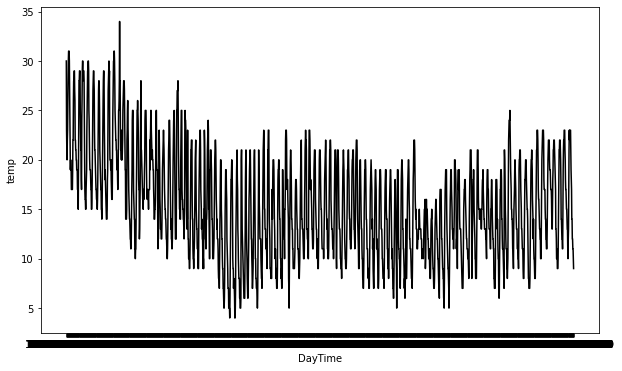

In [16]:
def timeseries (x_axis, y_axis, x_label, y_label):
    plt.figure(figsize = (10, 6))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel(y_label)
timeseries(df.index, df[' _tempm'],'DayTime','temp')


In [17]:
train_size = int(len(df)*0.8)
train_dataset, test_dataset = df.iloc[:train_size],df.iloc[train_size:]

In [18]:

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

Dimension of train data:  (1600, 7)
Dimension of test data:  (400, 7)


In [19]:
X_train = train_dataset.drop(' _tempm', axis = 1)
y_train = train_dataset.loc[:,[' _tempm']]

X_test = test_dataset.drop(' _tempm', axis = 1)
y_test = test_dataset.loc[:,[' _tempm']]

In [20]:
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)

In [21]:
def create_dataset (X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        v = X[i:i+time_steps, :]
        Xs.append(v)
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)
TIME_STEPS = 1
X_test, y_test = create_dataset(test_x_norm, test_y_norm)
X_train, y_train = create_dataset(train_x_norm, train_y_norm)
print('X_train.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_train.shape)

X_train.shape:  (399, 1, 6)
y_train.shape:  (1599, 1)
X_test.shape:  (399, 1, 6)
y_test.shape:  (1599, 1)


In [22]:
def create_model(units, m):
    model = Sequential()
    model.add(m (units = units, return_sequences = True,
                input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2))
    model.add(m (units = units))
    model.add(Dropout(0.2))
    model.add(Dense(units = 1))
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
model_lstm = create_model(64, LSTM)

In [23]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,validation_split = 0.2, batch_size = 32,shuffle = False, callbacks = [early_stop])
    return history
history_bilstm = fit_model(model_lstm)

Epoch 1/100
40/40 [==============================] - 4s 23ms/step - loss: 0.1261 - val_loss: 0.0231
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.0130
Epoch 3/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.0108
Epoch 4/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.0080
Epoch 5/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.0065
Epoch 6/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.0058
Epoch 7/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0143 - val_loss: 0.0054
Epoch 8/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0120 - val_loss: 0.0051
Epoch 9/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 0.0052
Epoch 10/100
40/40 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.0051
Epoch 11

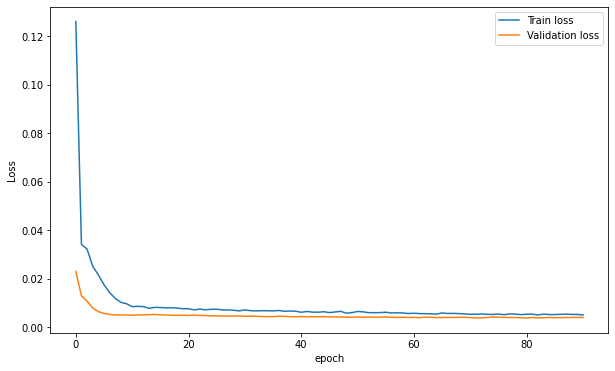

In [24]:
def plot_loss (history):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
plot_loss (history_bilstm)

In [25]:
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

In [26]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction
prediction_bilstm = prediction(model_lstm)

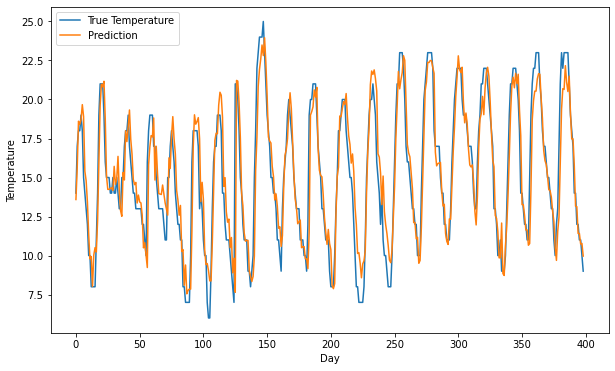

In [27]:
def plot_future(prediction, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), 
             label='True Temperature')     
    plt.plot(np.arange(range_future),np.array(prediction),
            label='Prediction')
    plt.legend(loc='upper left')
    plt.xlabel('Day')
    plt.ylabel('Temperature')
plot_future(prediction_bilstm, y_test)

In [41]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))

In [43]:
evaluate_prediction(prediction_bilstm, y_test, 'LSTM')

LSTM:
Mean Absolute Error: 1.3466
Root Mean Square Error: 1.8371


In [29]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 13.0 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 1.1 MB 62.9 MB/s 
     |████████████████████████████████| 253 kB 41.0 MB/s 
     |████████████████████████████████| 2.0 MB 53.1 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 85.3 MB/s 
     |████████████████████████████████| 271 kB 89.8 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 58.3 MB/s 
     |████████████████████████████████| 11.1 MB 42.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 9.1 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 62 k

In [30]:
def create_datasetf (X, time_steps = 1):
    Xs = []
    for i in range(1):
        v = X[i:i+time_steps, :]
        Xs.append(v)
    return np.array(Xs)

In [31]:
def predictionn(dewptm,humidity,winddirection,visibility,windspeed,rain):
    arr = np.array([dewptm,humidity,winddirection,visibility,windspeed,rain])
    arr=arr.reshape(1,-1)
    arr = input_scaler.transform(arr)
    TIME_STEPS = 1
    arr_test = create_datasetf(arr, TIME_STEPS)
    predictionn = model_lstm.predict(arr_test)
    predictionn = scaler_y.inverse_transform(predictionn)
    return predictionn

In [32]:
import gradio as gr

In [33]:
import gradio as gr
demo = gr.Interface(
    fn=predictionn,
    inputs=["number", "number", "number","number","number",gr.Slider(0, 1)],
    outputs=["number"],
    title="Bangladesh LSTM Temperature Prediction"
)
demo.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://13917.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f9cee1a8210>,
 'http://127.0.0.1:7860/',
 'https://13917.gradio.app')

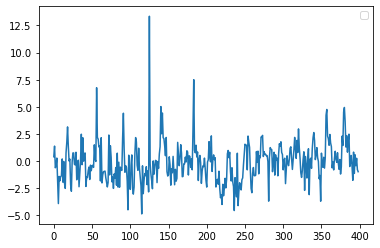

In [37]:
residuals=y_test-prediction_bilstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
residuals = DataFrame(residuals)
# plot residuals
residuals.plot()
plt.xlabel="Day"
plt.legend("","")
plt.show()

TypeError: ignored

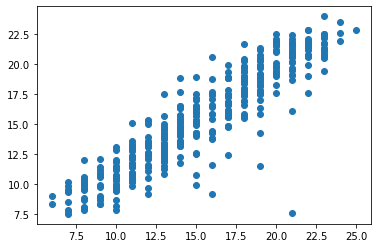

In [38]:

plt.scatter(y_test,prediction_bilstm)
plt.xlabel("Y_test")
plt.ylabel("predicted")

plt.show() 